In [1]:
# Read the numerical model output, make some maps to check the conditions, crop the fields of interest in the areas
# of interest and save them in a netcdf file.

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [104]:
# To plot maps.
crs = ccrs.PlateCarree()

def plot_background(ax):
    #ax.set_extent(extent_param)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    #ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'fontsize': 14}
    gl.ylabel_style = {'fontsize': 14}
    return ax

In [ ]:
# Set the paths and the file names of the (coupled) oceanic and atmospheric model outputs.
path2atm = '/mnt/storage_unimib/agostino/genoa2014/3CPLD/'
path2oce = '/mnt/storage_unimib/agostino/genoa2014/3CPLD/CPLD_HIS/'

In [41]:
# Set the instant of interest.
str_instant = '2014-10-07T12:00:00'
# Valid range: from 2014-10-06_00:00:00 to 2014-10-10_00:00:00.

atm_filename = path2atm + 'wrfout_d01_' + str_instant[:10] + '_' + str_instant[11:]
oce_filename = path2oce + 'roms_cpld_his.0020.nc' 
# If str_instant is after '2014-10-07T12:00:00' select the roms_cpld_his.0025.nc file

In [63]:
# Read the oceanic grid file.
oce_grd_filename = '/mnt/storage_unimib/agostino/genoa2014/3CPLD/spinup/INPUTS/roms_grd.nc'
ds_oce_grd = xr.open_dataset(oce_grd_filename)
lon_oce = ds_oce_grd['lon_rho'].values
lat_oce = ds_oce_grd['lat_rho'].values
mask_oce = ds_oce_grd['mask_rho'].values

# Read the file and select the right frame in the oceanic output.
ref_instant = np.datetime64(str_instant)

ds_oce = xr.open_dataset(oce_filename)


time0 = np.datetime64('2014-09-15T00:00:00') # Time of the initialization of the oceanic output time axis.
time_oce = time0 + ds_oce.time.values.astype('timedelta64[s]')

for hi in range(len(time_oce)):
    instant = time_oce[hi]
    if instant == ref_instant:
        print(instant)
        uc = ds_oce['u'][hi,-1,1:,:].values
        vc = ds_oce['v'][hi,-1,:,1:].values
        
        # ROTATE THE CURRENT COMPONENTS TO THE EARTH GRID!!!!!
    
    

2014-10-07T12:00:00


<ipython-input-107-cd3d4d3c3f7b>:4: RuntimeWarning: invalid value encountered in true_divide
  pc = plt.pcolormesh(lon_oce,lat_oce,np.sqrt(uc**2+vc**2)/mask_oce[1:,1:])


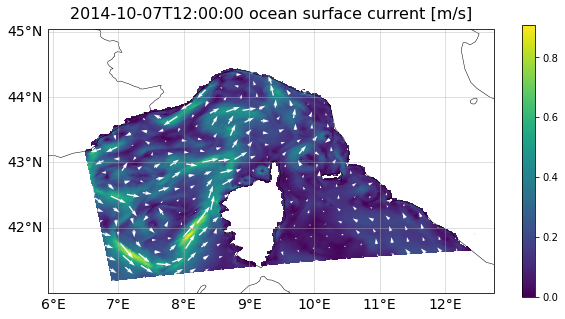

In [107]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1, projection=crs)
plot_background(ax)
pc = plt.pcolormesh(lon_oce,lat_oce,np.sqrt(uc**2+vc**2)/mask_oce[1:,1:])
step = 15
qv = plt.quiver(lon_oce[::step,::step],lat_oce[::step,::step],uc[::step,::step],vc[::step,::step],
                color='w',scale=15)

plt.title(str_instant + ' ocean surface current [m/s]', fontsize=16)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.colorbar(pc)

In [65]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1, projection=crs)
plot_background(ax)
pc = plt.pcolormesh(lon_oce,lat_oce,np.sqrt(uc**2+vc**2)/mask_oce[1:,1:])
step = 15
qv = plt.quiver(lon_oce[::step,::step],lat_oce[::step,::step],uc[::step,::step],vc[::step,::step],
                color='w',scale=15)

plt.title(str_instant + ' ocean surface current [m/s]', fontsize=16)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.colorbar(pc)

<xarray.Dataset>
Dimensions:     (auxil: 4, eta_rho: 264, eta_v: 263, s_rho: 60, time: 5, xi_rho: 347, xi_u: 346)
Coordinates:
  * time        (time) float32 0.0 1.814e+06 1.858e+06 1.901e+06 1.944e+06
Dimensions without coordinates: auxil, eta_rho, eta_v, s_rho, xi_rho, xi_u
Data variables:
    time_step   (time, auxil) int32 ...
    ocean_time  (time) float32 ...
    zeta        (time, eta_rho, xi_rho) float32 ...
    ubar        (time, eta_rho, xi_u) float32 ...
    vbar        (time, eta_v, xi_rho) float32 ...
    u           (time, s_rho, eta_rho, xi_u) float32 ...
    v           (time, s_rho, eta_v, xi_rho) float32 ...
    temp        (time, s_rho, eta_rho, xi_rho) float32 ...
    salt        (time, s_rho, eta_rho, xi_rho) float32 ...
    diff3d      (time, s_rho, eta_rho, xi_rho) float32 ...
Attributes: (12/54)
    type:           ROMS history file
    title:          Ligurian Sea model (1.3 km) d03coupled
    date:           
    rst_file:       \t\t   \t   XXX\t.00
    his_file:       CPLD_HIS/roms_cpld_his.0020.00.nc
    avg_file:       CPLD_AVG/roms_cpld_avg.00.nc
    ...             ...
    gamma2_expl:    Slipperiness parameter
    x_sponge:       0.0
    v_sponge:       0.0
    sponge_expl:    Sponge parameters : extent (m) & viscosity (m2.s-1)
    SRCS:           main.F step.F read_inp.F timers_roms.F init_scalars.F ini...
    CPP-options:    REGIONAL LIGU MPI OA_COUPLING OBC_WEST OBC_SOUTH PARALLEL...